#### based on Figs. 4 from Abdul-Razzak and Ghan 2000 (JGR: Atmos.)  "_A parameterization of aerosol activation: 2. Multiple aerosol types_"

An example of kinetic limitations of growth for large aerosols

http://doi.wiley.com/10.1029/1999JD901161

In [2]:
import numpy as np
from matplotlib import pyplot
from atmos_cloud_sim_uj_utils import show_plot

from PySDM_examples.Abdul_Razzak_Ghan_2000.run_ARG_parcel import run_parcel
n_sd_per_mode = 20

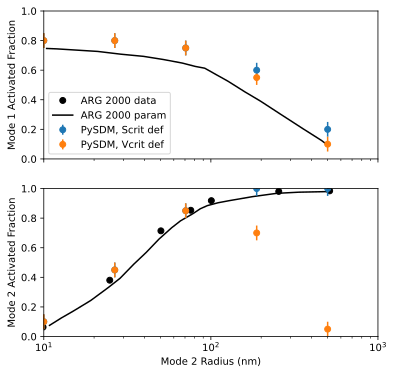

HTML(value="<a href='./fig_4.pdf' target='_blank'>./fig_4.pdf</a><br>")

In [6]:
a_rad2_obs = [0.009935074902399183, 0.02489084291235577, 0.050627295045896775, 0.0750810625568039, 0.10032621481488437,
              0.25217226111925467, 0.5095814127548347]
a_AF_obs = [0.7866666666666666, 0.7586666666666666, 0.7146666666666666, 0.6839999999999999, 0.6506666666666667,
            0.4013333333333333, 0.12266666666666667]

a_rad2_param = [0.010398558176237407, 0.011922822170487846, 0.01483015485791573, 0.021013064412958932,
                0.028913672210108283, 0.03952649091680607, 0.0519637089296805, 0.06743017922474633, 0.08065806660390755,
                0.09188082665813241, 0.10777842296164428, 0.1260156048064904, 0.1598370702863125, 0.19816625542394176,
                0.25882887807971816, 0.35614478651156634, 0.4606449735804084, 0.5013504888178284]
a_AF_param = [0.7466666666666666, 0.744, 0.7373333333333334, 0.7266666666666666, 0.708, 0.6933333333333334,
              0.6719999999999999, 0.648, 0.6253333333333333, 0.6133333333333333, 0.5693333333333334, 0.5266666666666666,
              0.4533333333333333, 0.39066666666666666, 0.30533333333333335, 0.20400000000000001, 0.12400000000000001,
              0.09200000000000001]

b_rad2_obs = [0.009901663304056691, 0.024822743830633227, 0.05023442442984435, 0.07582777734439355, 0.10066099764048131,
              0.25485590857890217, 0.5140622784173832]
b_AF_obs = [0.06363636363636363, 0.3805194805194806, 0.7142857142857144, 0.8532467532467534, 0.9181818181818182,
            0.9805194805194806, 0.9844155844155846]

b_rad2_param = [0.010822678662544178, 0.012760436250146357, 0.014995662770320169, 0.019135119880936365, 0.02449781353843868,
                0.02860001345745697, 0.034621184073166916, 0.040954656754592984, 0.04892789247282757, 0.058261158079809215,
                0.06581302820245384, 0.07862580283595474, 0.08650733493819075, 0.09517892000062586, 0.11038713326488418,
                0.128871643665347, 0.17797444766159812, 0.24741109434009928, 0.3349930256451866, 0.4925130468761019]

b_AF_param = [0.07532467532467532, 0.12597402597402596, 0.17142857142857143, 0.24415584415584418, 0.3337662337662338,
              0.3935064935064936, 0.48961038961038966, 0.5675324675324676, 0.6584415584415586, 0.7350649350649352,
              0.781818181818182, 0.8324675324675326, 0.8636363636363638, 0.8844155844155845, 0.903896103896104,
              0.9181818181818182, 0.9454545454545455, 0.9675324675324677, 0.9753246753246754, 0.9792207792207794]

rad2 = np.geomspace(10,500,5) # 10 - 500 nm mean radius
AF_S = np.zeros((2,len(rad2)))
AF_V = np.zeros((2,len(rad2)))
AFerror = np.zeros(len(rad2))

w = 0.5 # 0.5 m/s
N2 = 100 # 100 1/cc
sol2 = 1 # 100% ammonium sulfate

for i,rad2i in enumerate(rad2):
    output, output_attributes, aerosol, act_S, act_V, error = run_parcel(w, sol2, N2, rad2i, n_sd_per_mode)
    AF_S[:,i] = act_S
    AF_V[:,i] = act_V
    AFerror[i] = error[0]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(np.asarray(a_rad2_obs)*1e-3, a_AF_obs, "ko", label="ARG 2000 data")
axes[0].plot(np.asarray(a_rad2_param)*1e3, a_AF_param, "k-", label="ARG 2000 param")
axes[1].plot(np.asarray(b_rad2_obs)*1e3, b_AF_obs, "ko")
axes[1].plot(np.asarray(b_rad2_param)*1e3, b_AF_param, "k-", label="ARG 2000 param")

for i, ax in enumerate(axes):
    ax.errorbar(rad2, AF_S[i,:], yerr=AFerror, fmt='o', label="PySDM, Scrit def")
    ax.errorbar(rad2, AF_V[i,:], yerr=AFerror, fmt='o', label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1])
    ax.set_xscale('log')
    ax.set_xlim([10,1000])

pyplot.xlabel('Mode 2 Radius (nm)')
axes[0].legend(loc="best")
show_plot("fig_4.pdf")

## Kinetic limitations

Differences in activated fraction as diagnosed from peak supersaturation (compared to critical supersaturations) vs. droplet volumes (compared to critical volumes) is evident in this example for the cases where Mode 2 has a very large mean radius. Here we can see the kinetic limitations of activation where the large droplets take finite time to come into equilibrium with the ambient humidity and grow past their critical sizes. This is explored more in the figures below which show first the profile of ambient humidity compared to the critical supersaturation of each droplet, and then profiles of the ratio of the actual droplet volume to the critical volume. 

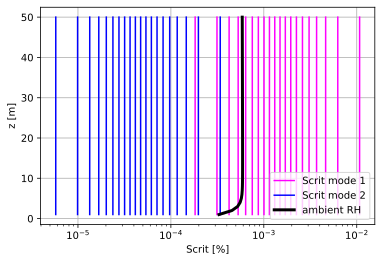

HTML(value="<a href='./RH_profile.pdf' target='_blank'>./RH_profile.pdf</a><br>")

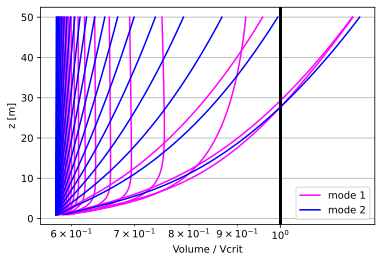

HTML(value="<a href='./Droplet_profile.pdf' target='_blank'>./Droplet_profile.pdf</a><br>")

In [12]:
for drop_id, Scrit in enumerate(output_attributes['critical supersaturation']):
    if drop_id < n_sd_per_mode:
        pyplot.plot(
            np.asarray(Scrit) - 1,
            output['z'],
            color='magenta',
            label="Scrit mode 1" if drop_id == 0 else ""
        )
    else:
        pyplot.plot(
            np.asarray(Scrit) - 1,
            output['z'],
            color='blue',
            label="Scrit mode 2" if drop_id == n_sd_per_mode else ""
        )
    pyplot.xlabel('Scrit [%]')
    pyplot.ylabel('z [m]')

pyplot.plot(np.asarray(output['RH'])-1, output['z'], 'k', lw=3, label='ambient RH')
pyplot.xscale('log')
pyplot.legend(loc='lower right')
pyplot.grid()
show_plot("RH_profile.pdf")

from PySDM import Formulae
formulae = Formulae()
for drop_id, Vcrit in enumerate(output_attributes['critical volume']):
    volume = np.asarray(output_attributes['volume'][drop_id])
    if drop_id < n_sd_per_mode:
        pyplot.plot(
            formulae.trivia.radius(volume=volume) / formulae.trivia.radius(volume=np.asarray(Vcrit)),
            output['z'],
            color='magenta',
            label="mode 1" if drop_id == 0 else ""
        )
    else:
        pyplot.plot(
            formulae.trivia.radius(volume=volume) / formulae.trivia.radius(volume=np.asarray(Vcrit)),
            output['z'],
            color='blue',
            label="mode 2" if drop_id == n_sd_per_mode else ""
        )
    pyplot.xlabel('Volume / Vcrit')
    pyplot.ylabel('z [m]')
    pyplot.axvline(1, color='k')

pyplot.xscale('log')
pyplot.legend(loc='lower right')
pyplot.grid()
show_plot("Droplet_profile.pdf")